# Rocky Wu - jywu3

As usual, import the packages we want

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import bqplot
import matplotlib.colors as mpl_colors

Set the seed for the down sampling to make sure we could reproduce the results

In [2]:
np.random.seed(2022)

### Explore the dataset:

The name of the dataset: Yellow Taxi trip data 2021-01 in NYC

We can obtain the dataset at the TLC official site. [link towards the dataset webpage](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

The link towards the dataset:
https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2021-01.csv

Preferably, download the dataset first as the dataset is fairly large, 126MB. 

No identification of the license, so I am assuming we can play around with it. We do have an user guide of the dataset, but not much was mentioned on what we can do with the data. Link to the user guide: https://www1.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf

The dictionary of the dataset:https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf



#### Columns explained:
VendorID - A code indicating the TPEP provider that provided the record. [1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.]

tpep_pickup_datetime - The date and time when the meter was engaged.

tpep_dropoff_datetime - The date and time when the meter was disengaged.

Passenger_count - The number of passengers in the vehicle. This is a driver-entered value.

Trip_distance - The elapsed trip distance in miles reported by the taximeter.

PULocationID - TLC Taxi Zone in which the taximeter was engaged

DOLocationID - TLC Taxi Zone in which the taximeter was disengaged

RateCodeID - The final rate code in effect at the end of the trip.
[1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride]

Store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
[Y= store and forward trip, N= not a store and forward trip]

Payment_type - A numeric code signifying how the passenger paid for the trip.
[1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip]

Fare_amount - The time-and-distance fare calculated by the meter.

Extra - Miscellaneous extras and surcharges. Currently, this only includes the \\$0.50 and \\$1 rush hour and overnight charges.

MTA_tax - \\$0.50 MTA tax that is automatically triggered based on the metered rate in use.

Improvement_surcharge - \\$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.

Tip_amount - This field is automatically populated for credit card tips. Cash tips are not included.

Tolls_amount - Total amount of all tolls paid in trip.

Total_amount - The total amount charged to passengers. Does not include cash tips.

In [3]:
# Original import using the link
# data = pd.read_csv("https://s3.amazonaws.com/
# nyc-tlc/trip+data/yellow_tripdata_2021-01.csv")
data = pd.read_csv("../data/yellow_tripdata_2021-01.csv", 
                   low_memory=False)

There was a warning indicating the dtype conflicts in some of the columns in the dataset. Will deal with the warning in the later stage. Escaping the warning by setting low_memory = False

Take a look of the dataset

In [4]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5


In total 1369765 rows inside the dataset, indeed a large one.

In [5]:
dataLength = len(data)
dataLength

1369765

How many columns:

In [6]:
len(data.columns)

18

Take a look on the columns

In [7]:
for c in data.columns:
    print(c)

VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
RatecodeID
store_and_fwd_flag
PULocationID
DOLocationID
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount
congestion_surcharge


We will first downsample the dataset, else my computer could not handle the dataset

In [8]:
np.random.seed(0)
nsamples = len(data) // 10
downSampleMask = np.random.choice(range(len(data)-1), 
                                  nsamples, replace=False)
downSampleMask, len(downSampleMask)

(array([1215088,  612594,  259095, ..., 1303868,  674338,  152455]), 136976)

In [9]:
data = data.loc[downSampleMask]
len(data)

136976

In [10]:
dataLength = len(data)
dataLength

136976

In [11]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1215088,1.0,2021-01-30 12:21:33,2021-01-30 12:26:14,0.0,1.00,1.0,N,79,107,2.0,5.5,2.5,0.5,0.00,0.0,0.3,8.80,2.5
612594,2.0,2021-01-16 12:23:31,2021-01-16 12:29:11,1.0,1.19,1.0,N,164,68,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5
259095,2.0,2021-01-08 07:07:00,2021-01-08 07:10:36,5.0,1.07,1.0,N,114,90,1.0,5.5,0.0,0.5,1.76,0.0,0.3,10.56,2.5
1049052,2.0,2021-01-26 19:17:16,2021-01-26 19:33:39,3.0,2.92,1.0,N,140,238,1.0,13.0,1.0,0.5,2.00,0.0,0.3,19.30,2.5
220625,2.0,2021-01-07 10:13:49,2021-01-07 10:16:42,1.0,0.74,1.0,N,246,68,1.0,4.5,0.0,0.5,0.00,0.0,0.3,7.80,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434599,2.0,2021-01-12 14:05:52,2021-01-12 14:36:08,1.0,12.89,1.0,N,263,228,1.0,36.5,0.0,0.5,1.99,0.0,0.3,41.79,2.5
509440,2.0,2021-01-14 08:48:17,2021-01-14 08:56:49,1.0,0.77,1.0,N,263,141,1.0,7.0,0.0,0.5,2.58,0.0,0.3,12.88,2.5
1303868,NaN,2021-01-08 13:01:50,2021-01-08 13:01:05,NaN,0.40,NaN,NaN,265,188,NaN,15.2,0.0,0.5,0.00,0.0,0.3,16.00,0.0
674338,1.0,2021-01-18 10:49:15,2021-01-18 11:00:07,3.0,1.90,1.0,N,90,79,1.0,9.5,2.5,0.5,2.55,0.0,0.3,15.35,2.5


### Explore the values inside each column

The below prints out if there were any nan values inside each column, before printing out the nan values, we would need to convert some columns' datatype

In [12]:
data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

From the above, we can tell that the two datetime columns and the flag column need some cleaning. We would convert the object in datetime columns into datetime objectsm and the flag should be converted to string/text data type. 

The two datetime columns first:

In [13]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [14]:
data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [15]:
data['tpep_pickup_datetime'].head(), data['tpep_dropoff_datetime'].head()

(1215088   2021-01-30 12:21:33
 612594    2021-01-16 12:23:31
 259095    2021-01-08 07:07:00
 1049052   2021-01-26 19:17:16
 220625    2021-01-07 10:13:49
 Name: tpep_pickup_datetime, dtype: datetime64[ns],
 1215088   2021-01-30 12:26:14
 612594    2021-01-16 12:29:11
 259095    2021-01-08 07:10:36
 1049052   2021-01-26 19:33:39
 220625    2021-01-07 10:16:42
 Name: tpep_dropoff_datetime, dtype: datetime64[ns])

Good, now we have changed the datatype of the dates into the correct type, lets see if there are any nan or strange entries in the column

In [16]:
pd.to_datetime(data['tpep_pickup_datetime']).dt.date.unique()

array([datetime.date(2021, 1, 30), datetime.date(2021, 1, 16),
       datetime.date(2021, 1, 8), datetime.date(2021, 1, 26),
       datetime.date(2021, 1, 7), datetime.date(2021, 1, 21),
       datetime.date(2021, 1, 18), datetime.date(2021, 1, 22),
       datetime.date(2021, 1, 11), datetime.date(2021, 1, 28),
       datetime.date(2021, 1, 9), datetime.date(2021, 1, 17),
       datetime.date(2021, 1, 6), datetime.date(2021, 1, 12),
       datetime.date(2021, 1, 29), datetime.date(2021, 1, 14),
       datetime.date(2021, 1, 4), datetime.date(2021, 1, 15),
       datetime.date(2021, 1, 24), datetime.date(2021, 1, 25),
       datetime.date(2021, 1, 23), datetime.date(2021, 1, 1),
       datetime.date(2021, 1, 31), datetime.date(2021, 1, 10),
       datetime.date(2021, 1, 5), datetime.date(2021, 1, 2),
       datetime.date(2021, 1, 3), datetime.date(2021, 1, 27),
       datetime.date(2021, 1, 13), datetime.date(2021, 1, 20),
       datetime.date(2021, 1, 19), datetime.date(2020, 12, 31)],

Notice that we have three errorous data in the dataset, some indicated 2008/12/31, some indicated 2020/12/31 and the rest indicating 2009/12/31. We should remove these entries.

In [17]:
data[(data['tpep_pickup_datetime'] <= "2020-12-31 23:59:59") 
     | (data['tpep_pickup_datetime'] > "2021-01-31 23:59:59")]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
3474,2.0,2020-12-31 23:06:12,2020-12-31 23:18:39,1.0,7.08,1.0,N,42,137,2.0,21.0,0.5,0.5,0.00,0.0,0.3,24.80,2.5
2846,2.0,2020-12-31 18:25:31,2020-12-31 18:35:41,1.0,2.72,1.0,N,142,233,1.0,10.5,0.5,0.5,2.86,0.0,0.3,17.16,2.5
455,2.0,2020-12-31 23:59:06,2021-01-01 00:02:51,2.0,0.74,1.0,N,237,236,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5
902,2.0,2020-12-31 23:55:40,2021-01-01 00:24:51,1.0,6.45,1.0,N,231,17,2.0,24.5,0.5,0.5,0.00,0.0,0.3,28.30,2.5


In [18]:
dropIndex = list(data[(data['tpep_pickup_datetime'] <= "2020-12-31 23:59:59") | (data['tpep_pickup_datetime'] > "2021-01-31 23:59:59")].index)

In [19]:
dropIndex

[3474, 2846, 455, 902]

In [20]:
data.drop([i for i in dropIndex], inplace=True)

In [21]:
pd.to_datetime(data['tpep_pickup_datetime']).dt.date.unique()

array([datetime.date(2021, 1, 30), datetime.date(2021, 1, 16),
       datetime.date(2021, 1, 8), datetime.date(2021, 1, 26),
       datetime.date(2021, 1, 7), datetime.date(2021, 1, 21),
       datetime.date(2021, 1, 18), datetime.date(2021, 1, 22),
       datetime.date(2021, 1, 11), datetime.date(2021, 1, 28),
       datetime.date(2021, 1, 9), datetime.date(2021, 1, 17),
       datetime.date(2021, 1, 6), datetime.date(2021, 1, 12),
       datetime.date(2021, 1, 29), datetime.date(2021, 1, 14),
       datetime.date(2021, 1, 4), datetime.date(2021, 1, 15),
       datetime.date(2021, 1, 24), datetime.date(2021, 1, 25),
       datetime.date(2021, 1, 23), datetime.date(2021, 1, 1),
       datetime.date(2021, 1, 31), datetime.date(2021, 1, 10),
       datetime.date(2021, 1, 5), datetime.date(2021, 1, 2),
       datetime.date(2021, 1, 3), datetime.date(2021, 1, 27),
       datetime.date(2021, 1, 13), datetime.date(2021, 1, 20),
       datetime.date(2021, 1, 19)], dtype=object)

Good, the errorous data were all dropped. Check if the length of the dataset is correct

In [22]:
dataLength - len(data) == len(dropIndex)

True

Now the flag one is bit complicated, we would have to deal with nan values...

Actually, we would not need to convert the flag columns, as we still can filter out the results using string. But we would still need to cope with the nan values in this column.

In [23]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype(str)

In [24]:
data[data['store_and_fwd_flag'] == 'N'].head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1215088,1.0,2021-01-30 12:21:33,2021-01-30 12:26:14,0.0,1.00,1.0,N,79,107,2.0,5.5,2.5,0.5,0.00,0.0,0.3,8.80,2.5
612594,2.0,2021-01-16 12:23:31,2021-01-16 12:29:11,1.0,1.19,1.0,N,164,68,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5
259095,2.0,2021-01-08 07:07:00,2021-01-08 07:10:36,5.0,1.07,1.0,N,114,90,1.0,5.5,0.0,0.5,1.76,0.0,0.3,10.56,2.5
1049052,2.0,2021-01-26 19:17:16,2021-01-26 19:33:39,3.0,2.92,1.0,N,140,238,1.0,13.0,1.0,0.5,2.00,0.0,0.3,19.30,2.5
220625,2.0,2021-01-07 10:13:49,2021-01-07 10:16:42,1.0,0.74,1.0,N,246,68,1.0,4.5,0.0,0.5,0.00,0.0,0.3,7.80,2.5


After cleaning the datatypes, we can use the pd.isnull to determine if there were nan values inside the columns

Print out the if nan values exists in the column

In [25]:
for c in data.columns:
    if pd.isnull(data[c].unique()).any():
        print(c)
    # print(c, pd.isnull(data[c].unique()).any())

VendorID
passenger_count
RatecodeID
payment_type


From the output above, we now know that there were some nan values in VendorID, passenger_count, RatecodeID, payment_type. Not really a huge problem, but we would need to be careful when creating viz. Good news is that we do not have any nan values inside our total_pay and other numerical columns

### Summary of the dataset:

There were in total 18 columns in the dataset. The names were printed above alongside their datatypes. The dataset represents the total trips of yellow taxi at NYC during January, 2021. The dataset includes many fields such as DateTime for each trip, specified to pick up time and drop off time. The trip distance, the fares, the rates, and the payment types and passenger numbers for each entry. On the site, the raw data is collected within the partnership with the NYC DOITT, but I could not find the person who created these datasets. The credits are not given either on the website or in the dataset. This dataset is interesting as we can analyze the pay for each driver and the relationship of their pay with the pay standard we have in NYC. Also, we can tell from this dataset that we could use this dataset to find out the market of taxis in NYC. The further analysis that I described above would also be interesting to explore.

### Plot of interest:

Lets make a simple one, a frequency graph with the x axis as everyday in January, and the y-axis as the count of taxi drives each date. (For each date, we are only considering the pickup time, as we will have some trips that begins late in one day and arrived on the next day, so I would merge these trips into the date when they started the trip)

In [26]:
# Create the count of each date in the data

data.groupby(pd.to_datetime(data['tpep_pickup_datetime']).dt.date).size()

tpep_pickup_datetime
2021-01-01    2395
2021-01-02    3357
2021-01-03    2558
2021-01-04    4400
2021-01-05    4681
2021-01-06    4947
2021-01-07    5033
2021-01-08    5048
2021-01-09    3964
2021-01-10    3010
2021-01-11    4645
2021-01-12    5146
2021-01-13    5091
2021-01-14    5294
2021-01-15    5336
2021-01-16    3894
2021-01-17    3299
2021-01-18    3691
2021-01-19    5203
2021-01-20    4970
2021-01-21    5358
2021-01-22    5387
2021-01-23    4151
2021-01-24    3141
2021-01-25    4710
2021-01-26    4799
2021-01-27    5364
2021-01-28    5570
2021-01-29    5423
2021-01-30    3956
2021-01-31    3151
dtype: int64

In [27]:
data['pickup_date'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.date
data['pickup_date'] = pd.to_datetime(data['pickup_date'])
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
1215088,1.0,2021-01-30 12:21:33,2021-01-30 12:26:14,0.0,1.00,1.0,N,79,107,2.0,5.5,2.5,0.5,0.00,0.0,0.3,8.80,2.5,2021-01-30
612594,2.0,2021-01-16 12:23:31,2021-01-16 12:29:11,1.0,1.19,1.0,N,164,68,1.0,6.5,0.0,0.5,1.96,0.0,0.3,11.76,2.5,2021-01-16
259095,2.0,2021-01-08 07:07:00,2021-01-08 07:10:36,5.0,1.07,1.0,N,114,90,1.0,5.5,0.0,0.5,1.76,0.0,0.3,10.56,2.5,2021-01-08
1049052,2.0,2021-01-26 19:17:16,2021-01-26 19:33:39,3.0,2.92,1.0,N,140,238,1.0,13.0,1.0,0.5,2.00,0.0,0.3,19.30,2.5,2021-01-26
220625,2.0,2021-01-07 10:13:49,2021-01-07 10:16:42,1.0,0.74,1.0,N,246,68,1.0,4.5,0.0,0.5,0.00,0.0,0.3,7.80,2.5,2021-01-07


Check if we accidentally create some errorous data

In [28]:
data['pickup_date'].unique()

array(['2021-01-30T00:00:00.000000000', '2021-01-16T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-26T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-22T00:00:00.000000000',
       '2021-01-11T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-01-09T00:00:00.000000000', '2021-01-17T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-12T00:00:00.000000000',
       '2021-01-29T00:00:00.000000000', '2021-01-14T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-15T00:00:00.000000000',
       '2021-01-24T00:00:00.000000000', '2021-01-25T00:00:00.000000000',
       '2021-01-23T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-31T00:00:00.000000000', '2021-01-10T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-27

The data looks good, now we were ready to create some simple data visualization on this dataset

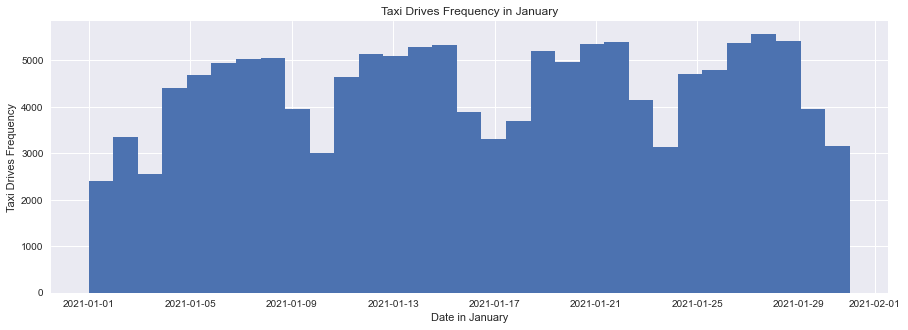

In [29]:
# Step 1 - hard code the stuff
style = 'seaborn'
graphBins = len(data['pickup_date'].unique())
with plt.style.context(style):
    fig, ax = plt.subplots(figsize=(15,5))
    plt.hist(x=data['pickup_date'], bins=graphBins)
    ax.set_xlabel('Date in January')
    ax.set_ylabel('Taxi Drives Frequency')
    ax.set_title('Taxi Drives Frequency in January')
    plt.show()

# Final Project Part 2 - Dashboard

We would continue on the previous frequency graph we made, and we would be producing more graphs as it goes. 

Lets check the data types again to make sure nothing is wrong

In [30]:
data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
pickup_date              datetime64[ns]
dtype: object

Good, seems nothing is wrong since the last part. Now lets try to shift the graph to bqplot

In [31]:
# try to shift to bqplot to produce the same graph

x_sch = bqplot.DateScale()
y_sch = bqplot.LinearScale()

# set p axis
x_axh = bqplot.Axis(scale = x_sch, label = 'Date in January')
# Adjusted the label offset so that the label would not collide
# with the data
y_axh = bqplot.Axis(scale = y_sch, 
                   orientation = 'vertical', 
                   label = 'Taxi Drives Frequency',
                   label_offset = "45px")

# (1) set up the marks
hist = bqplot.Hist(sample = data['pickup_date'],
                  normalized = False,
                  scales = {'sample':x_sch, 'count':y_sch},
                  bins=graphBins)

fig_hist = bqplot.Figure(marks=[hist], axes = [x_axh, y_axh])
# figh.layout.width = "800px"
fig_hist

Figure(axes=[Axis(label='Date in January', scale=DateScale()), Axis(label='Taxi Drives Frequency', label_offse…

So we have successfully reproduced the graph using bqplot. Now it is time to include some interactions and dashboards.

### Scatter plot of total amount and trip distance with the color axis as passenger count for the graph

Take a look at the total amount column

In [32]:
data['total_amount'].shape, data['total_amount'].sum()

((136972,), 2396730.92)

So, the shape of the total amount column is a 1 dimensional array, we need to group the total amounts into accumulation of each date

Try to create the grouped total amount

In [33]:
grouped_total_amount = data['total_amount'].groupby(data['pickup_date']).sum()
grouped_total_amount

pickup_date
2021-01-01    45422.42
2021-01-02    64858.98
2021-01-03    51032.95
2021-01-04    87375.48
2021-01-05    83595.62
2021-01-06    86387.95
2021-01-07    88985.54
2021-01-08    85977.45
2021-01-09    69356.73
2021-01-10    56834.30
2021-01-11    80639.65
2021-01-12    89830.89
2021-01-13    87438.22
2021-01-14    91878.82
2021-01-15    91425.93
2021-01-16    67242.08
2021-01-17    58732.25
2021-01-18    63740.34
2021-01-19    91020.51
2021-01-20    83115.40
2021-01-21    93639.47
2021-01-22    91984.50
2021-01-23    69247.84
2021-01-24    56704.51
2021-01-25    81172.67
2021-01-26    80155.63
2021-01-27    89967.46
2021-01-28    94840.15
2021-01-29    91641.41
2021-01-30    66239.49
2021-01-31    56246.28
Name: total_amount, dtype: float64

Check if we accidentally excluded some data

In [34]:
grouped_total_amount.sum() == round(data['total_amount'].sum(), 2)

True

Great, now we have the total amount sums grouped by date, now on the distance

In [35]:
data['trip_distance'].shape, data['trip_distance'].sum()

((136972,), 526464.3899999999)

So, the shape of the trip distance column is a 1 dimensional array, we need to group the trip distances into accumulation of each date

In [36]:
grouped_trip_distance = data['trip_distance'].groupby(data['pickup_date']).sum()
grouped_trip_distance

pickup_date
2021-01-01     8589.45
2021-01-02    11833.54
2021-01-03    10180.27
2021-01-04    13543.50
2021-01-05    14073.10
2021-01-06    14193.47
2021-01-07    14740.11
2021-01-08    64564.01
2021-01-09    40673.88
2021-01-10    61667.03
2021-01-11    13309.31
2021-01-12    14300.60
2021-01-13    13914.84
2021-01-14    14756.36
2021-01-15    14652.36
2021-01-16    11484.61
2021-01-17    10510.04
2021-01-18    10910.75
2021-01-19    14569.90
2021-01-20    13291.73
2021-01-21    14713.49
2021-01-22    14533.76
2021-01-23    11534.95
2021-01-24    10473.00
2021-01-25    13279.73
2021-01-26    12453.62
2021-01-27    13892.40
2021-01-28    14768.56
2021-01-29    14070.42
2021-01-30    10963.17
2021-01-31    10022.43
Name: trip_distance, dtype: float64

The last data we need to clean for this viz will be the passenger count. I would like to add this as the color axis of our heat map

In [37]:
pd.isnull(data['passenger_count'].unique()).any()

True

In [38]:
data['passenger_count']

1215088    0.0
612594     1.0
259095     5.0
1049052    3.0
220625     1.0
          ... 
434599     1.0
509440     1.0
1303868    NaN
674338     3.0
152455     1.0
Name: passenger_count, Length: 136972, dtype: float64

Now, we have empty nan values. For the purpose of this graph, I will replace them with 0 as we are calculating the sum for each date

In [39]:
data['passenger_count'] = data['passenger_count'].replace(np.nan, 0)
data['passenger_count']

1215088    0.0
612594     1.0
259095     5.0
1049052    3.0
220625     1.0
          ... 
434599     1.0
509440     1.0
1303868    0.0
674338     3.0
152455     1.0
Name: passenger_count, Length: 136972, dtype: float64

Now, calculate the sum of the passenger count grouped by date

In [40]:
grouped_passenger_count = data['passenger_count'].groupby(data['pickup_date']).sum()
grouped_passenger_count

pickup_date
2021-01-01    3373.0
2021-01-02    4597.0
2021-01-03    3410.0
2021-01-04    5688.0
2021-01-05    6035.0
2021-01-06    6259.0
2021-01-07    6471.0
2021-01-08    6684.0
2021-01-09    5453.0
2021-01-10    4114.0
2021-01-11    6075.0
2021-01-12    6554.0
2021-01-13    6356.0
2021-01-14    6920.0
2021-01-15    7000.0
2021-01-16    5281.0
2021-01-17    4465.0
2021-01-18    4816.0
2021-01-19    6688.0
2021-01-20    6379.0
2021-01-21    6948.0
2021-01-22    6874.0
2021-01-23    5735.0
2021-01-24    4242.0
2021-01-25    6108.0
2021-01-26    6234.0
2021-01-27    6825.0
2021-01-28    7201.0
2021-01-29    6977.0
2021-01-30    5361.0
2021-01-31    4227.0
Name: passenger_count, dtype: float64

Now we have the all the data we need, we could create a scatter plot on this

In [41]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

#(1) set up marks
scatters = bqplot.Scatter(x = data['trip_distance'],
                          y = data['total_amount'],
                          scales = {'x': x_sc, 'y': y_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax]) 
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

From the graph we can tell, our data is a bit of large so it the range is fairly big. And I haven't implement the color axis, which will be the passenger count of the dataset

In [42]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

# Add in color scale
c_sc = bqplot.ColorScale()
# color axes:
c_ax = bqplot.ColorAxis(scale = c_sc, label = 'Passenger Count', 
                       orientation = 'vertical', side = 'right')
                       # label_offset = "100px")

# set up marks
scatters = bqplot.Scatter(x = grouped_trip_distance,
                          y = grouped_total_amount,
                          color = grouped_passenger_count,
                          scales = {'x': x_sc, 
                                    'y': y_sc,
                                    'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
# fig.layout.width = "600px"
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

After plotting the graph, not a bad color map, but I would still like to take the log for the passenger count, as it does have a huge range in sum

In [43]:
grouped_passenger_count.min(), grouped_passenger_count.max()

(3373.0, 7201.0)

Replot the graph with log10 computation on the passenger count

In [44]:
# Set up x/y scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# Set p axis
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   orientation = 'vertical', 
                   label='Total Amount',
                  label_offset = "48px")

# Add in color scale
c_sc = bqplot.ColorScale()
# color axes:
c_ax = bqplot.ColorAxis(scale = c_sc, label = 'log(pass_c)', 
                       orientation = 'vertical', side = 'right')

# set up marks
scatters = bqplot.Scatter(x = grouped_trip_distance,
                          y = grouped_total_amount,
                          color = np.log10(grouped_passenger_count),
                          scales = {'x': x_sc, 
                                    'y': y_sc,
                                    'color':c_sc})

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax, c_ax]) 
fig

Figure(axes=[Axis(label='Trip Distance', scale=LinearScale()), Axis(label='Total Amount', label_offset='48px',…

Well... No clear difference indicated after taking the log of the passenger count... Will remove the log in later stage

Now we will try to create the heatmap by transforming the scatter plot we have into the heatmap

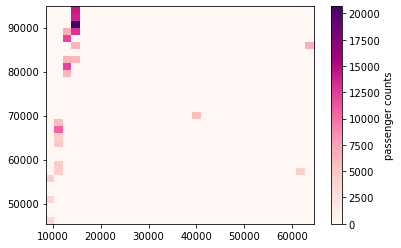

In [45]:
plt.hist2d(x=grouped_trip_distance, 
           y=grouped_total_amount, 
           weights=grouped_passenger_count, 
          bins = graphBins, 
          cmap = 'RdPu')
cb = plt.colorbar()
cb.set_label('passenger counts')

In [46]:
grouped_passenger_count.max(), grouped_passenger_count.min()

(7201.0, 3373.0)

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  


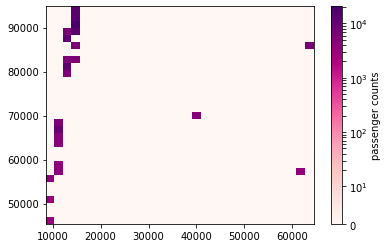

In [47]:
plt.hist2d(x=grouped_trip_distance, 
           y=grouped_total_amount, 
           weights=grouped_passenger_count, 
          bins = graphBins, 
          cmap = 'RdPu',
          norm = mpl_colors.SymLogNorm(10))
cb = plt.colorbar()
cb.set_label('passenger counts')

In [48]:
ntrip_distance = 20
ntotal_payment = 20

hist2d, trip_edges, pay_edges = np.histogram2d(grouped_trip_distance,
                                              grouped_total_amount,
                                              weights=grouped_passenger_count,
                                              bins = [ntrip_distance, ntotal_payment])

hist2d

array([[ 3373.,     0.,  3410.,     0.,  8469.,  4465.,     0.,  4816.,
         5361.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,  4597.,
         5281.,  5735.,     0.,     0.,     0.,     0., 18417., 12414.,
         5688.,  6356., 13802.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         6259., 13025., 27482., 14149.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.],
       [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
   

In [49]:
hist2d.max(), hist2d.min()

(27482.0, 0.0)

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


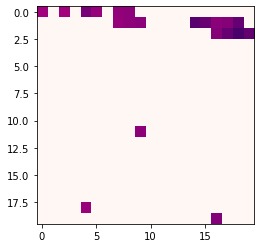

In [50]:
plt.imshow(hist2d, cmap='RdPu', norm = mpl_colors.SymLogNorm(10))

/Users/rockywu/opt/anaconda3/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  """Entry point for launching an IPython kernel.


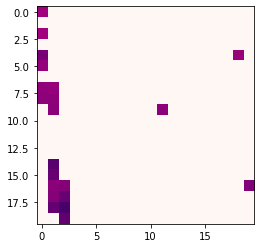

In [51]:
plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

In [52]:
hist2d, trip_edges, pay_edges = np.histogram2d(x=grouped_trip_distance,
                                              y=grouped_total_amount,
                                              weights=grouped_passenger_count,
                                               density = True,
                                              bins = [ntrip_distance, ntotal_payment])

hist2d.max(), hist2d.min()

(2.2158148313657574e-08, 0.0)

In [53]:
hist2d.shape, trip_edges.shape, pay_edges.shape

((20, 20), (21,), (21,))

In [54]:
trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
trip_centers

array([ 9988.814, 12787.542, 15586.27 , 18384.998, 21183.726, 23982.454,
       26781.182, 29579.91 , 32378.638, 35177.366, 37976.094, 40774.822,
       43573.55 , 46372.278, 49171.006, 51969.734, 54768.462, 57567.19 ,
       60365.918, 63164.646])

In [55]:
pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2
pay_centers

array([46657.86325, 49128.74975, 51599.63625, 54070.52275, 56541.40925,
       59012.29575, 61483.18225, 63954.06875, 66424.95525, 68895.84175,
       71366.72825, 73837.61475, 76308.50125, 78779.38775, 81250.27425,
       83721.16075, 86192.04725, 88662.93375, 91133.82025, 93604.70675])

In [56]:
trip_bins = np.linspace(100046.37, 523669.85, ntrip_distance + 1)
pay_bins = np.linspace(479386.87, 946813.78, ntotal_payment + 1)
print(trip_bins, trip_bins.shape)
print(pay_bins, pay_bins.shape)

[100046.37  121227.544 142408.718 163589.892 184771.066 205952.24
 227133.414 248314.588 269495.762 290676.936 311858.11  333039.284
 354220.458 375401.632 396582.806 417763.98  438945.154 460126.328
 481307.502 502488.676 523669.85 ] (21,)
[479386.87   502758.2155 526129.561  549500.9065 572872.252  596243.5975
 619614.943  642986.2885 666357.634  689728.9795 713100.325  736471.6705
 759843.016  783214.3615 806585.707  829957.0525 853328.398  876699.7435
 900071.089  923442.4345 946813.78  ] (21,)


In [57]:
hist2d, trip_edges, pay_edges = np.histogram2d(grouped_trip_distance,
                                              grouped_total_amount,
                                              weights=grouped_passenger_count,
                                              bins = [trip_bins, pay_bins])

hist2d.max(), hist2d.min()

(0.0, 0.0)

In [58]:
trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2

In [59]:
hist2d = hist2d.T

In [60]:
hist2d.min(), hist2d.max(), hist2d[hist2d>0].min()

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
np.log10(hist2d).min()

In [ ]:
hist2d[hist2d <= 0] = np.nan
hist2d = np.log10(hist2d)
hist2d[:10]

### Convert the binning and reshaping into a function

In [ ]:
def generate_histogram_from_trip_pay(data, ntrip=20, npay=20, tripmin=100046.37, tripmax=523669.85,
                                     paymin=479386.87, paymax=946813.78,
                                     takeLog=True):
    trip_bins = np.linspace(tripmin, tripmax, ntrip+1)
    pay_bins = np.linspace(paymin, paymax, npay+1)
    hist2d, trip_edges, pay_edges = np.histogram2d(grouped_trip_distance,
                                                  grouped_total_amount,
                                                  weights=grouped_passenger_count,
                                                  bins = [trip_bins, pay_bins])
    hist2d = hist2d.T
    if takeLog:
        hist2d[hist2d <= 0] = np.nan # set zeros to NaNs
        # then take log
        hist2d = np.log10(hist2d)
        trip_centers = (trip_edges[:-1] + trip_edges[1:]) / 2
        pay_centers = (pay_edges[:-1] + pay_edges[1:]) / 2
    return hist2d, trip_centers, pay_centers, trip_edges, pay_edges

Now we would just use the function

In [ ]:
hist2d, trip_centers, pay_centers, trip_edges, pay_edges = generate_histogram_from_trip_pay(data)

Good, finally we can take a look at the heatmap

In [ ]:
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min = np.nanmin(hist2d),
                          max = np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis
c_ax = bqplot.ColorAxis(scale=col_sc, 
                        orientation='vertical', 
                       side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

heat_map = bqplot.GridHeatMap(color = hist2d,
                             row = pay_centers,
                             column = trip_centers,
                             scales = {'color':col_sc,
                                      'row':y_sc,
                                      'column':x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity':1.0},
                             unselected_style = {'opacity':1.0})

# show the fig
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig

Finally, we can build up a dashboard

In [ ]:
# scales
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min = np.nanmin(hist2d),
                          max = np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis
c_ax = bqplot.ColorAxis(scale=col_sc, 
                        orientation='vertical', 
                       side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

# marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                             row = pay_centers,
                             column = trip_centers,
                             scales = {'color':col_sc,
                                      'row':y_sc,
                                      'column':x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity':1.0},
                             unselected_style = {'opacity':1.0})

# interaction:
mySelectedLabel = ipywidgets.Label()
def get_data_value(change):
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = hist2d[i, j]
        mySelectedLabel.value = "Passenger Count in log " + str(v)
        
heat_map.observe(get_data_value, 'selected')

# show the fig
fig = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

## Scatter plot + heatmap + DashBoard

Great, now we could connect our graphs together

In [ ]:
# Create the label
mySelectedLabel = ipywidgets.Label()

### Heat Map first~

In [ ]:
# scales
col_sc = bqplot.ColorScale(scheme="RdPu",
                          min = np.nanmin(hist2d),
                          max = np.nanmax(hist2d))
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

# create axis
c_ax = bqplot.ColorAxis(scale=col_sc, 
                        orientation='vertical', 
                       side = 'right')
x_ax = bqplot.Axis(scale = x_sc, label='Trip Distance')
y_ax = bqplot.Axis(scale = y_sc, 
                   label = 'Total Payment', 
                  orientation='vertical',
                  label_offset = "45px")

# marks
heat_map = bqplot.GridHeatMap(color = hist2d,
                             row = pay_centers,
                             column = trip_centers,
                             scales = {'color':col_sc,
                                      'row':y_sc,
                                      'column':x_sc},
                             interactions = {'click':'select'},
                             anchor_style = {'fill':'blue'},
                             selected_style = {'opacity':1.0},
                             unselected_style = {'opacity':1.0})

### Then scatter plot

In [ ]:
data['pickup_date'].min(), data['pickup_date'].max()

In [ ]:
# scales
x_scl = bqplot.DateScale(min=data['pickup_date'].min(),max=data['pickup_date'].max())
y_scl = bqplot.LogScale()

# axis
ax_xcl = bqplot.Axis(label = "Date", scale=x_scl)
ax_ycl = bqplot.Axis(label = 'Passenger Count in Log', scale = y_scl,
                    orientation = 'vertical', side = 'left')

# Start with an default data - just randomly picked one
i, j = 15, 0
trips = [trip_edges[j], trip_edges[j+1]]
pays = [pay_edges[i], pay_edges[i+1]]
pass_scatt = bqplot.Scatter(x=data['pickup_date'],
                               y=data['passenger_count'],
                               scales = {'x':x_scl, 'y':y_scl})

Define the interaction function~

In [ ]:
data.columns

In [ ]:
def get_data_value(change):
    if len(change['owner'].selected) == 1:
        i, j = change['owner'].selected[0]
        v = hist2d[i, j]
        mySelectedLabel.value = "Passenger Count " + str(v)
        trips = [trip_edges[j], trip_edges[j+1]]
        pays = [pay_edges[i], pay_edges[i+1]]
        region_mask = ((data['total_amount'] >= pays[0]) & (data['total_amount']<=pays[1]) &\
                    (data['trip_distance'] >= trips[0]) & (data['trip_distance']<=trips[1]) )
        pass_scatt = bqplot.Scatter(x=data['pickup_date'][region_mask],
                               y=data['passenger_count'][region_mask],
                               scales = {'x':x_scl, 'y':y_scl})
        
heat_map.observe(get_data_value, 'selected')

In [ ]:
region_mask = ((data['total_amount'] >= pays[0]) & (data['total_amount']<=pays[1]) &\
                    (data['trip_distance'] >= trips[0]) & (data['trip_distance']<=trips[1]) )

pays[1]

In [ ]:
# (5) create figures
fig_heatmap = bqplot.Figure(marks = [heat_map], axes = [c_ax, y_ax, x_ax])
fig_pass = bqplot.Figure(marks = [pass_scatt], axes = [ax_xcl, ax_ycl])

In [ ]:
fig_heatmap.layout.min_width='500px'
fig_pass.layout.min_width='500px'

myDashboard = ipywidgets.VBox([mySelectedLabel, ipywidgets.HBox([fig_heatmap,fig_pass])])
myDashboard